In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
data=pd.read_csv('AM.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [4]:
data.shape


(6516, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [6]:
data.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1     1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2     1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3     1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4     1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...          ...         ...         ...         ...         ...         ...   
6511  2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
6512  2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
6513  2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
6514  2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
6515  2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

     

In [7]:
data=data[['Date', 'Close']]

In [8]:
data.head()

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


In [9]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

C:\Users\thano\AppData\Local\Temp\ipykernel_6768\2068800234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=pd.to_datetime(data['Date'])


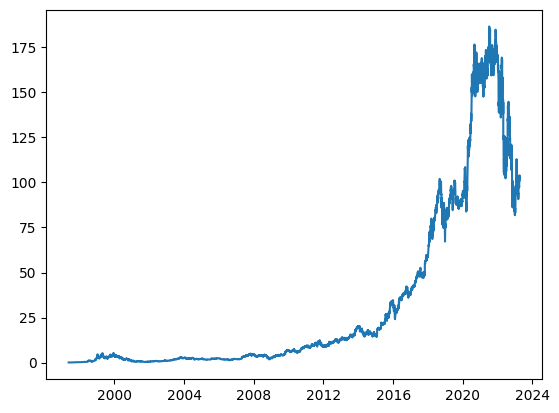

In [10]:
data['Date']=pd.to_datetime(data['Date'])
plt.plot(data['Date'], data['Close'])

In [11]:
from copy import deepcopy as dc

In [12]:
def prepare_dataframe_for_lstm(df, n_steps):
    df=dc(df)
    df['Date']=pd.to_datetime(df['Date'])
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})']=df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df
lookback=7
shifted_df=prepare_dataframe_for_lstm(data,lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [13]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np=scaler.fit_transform(shifted_df_as_np)
shifted_df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [15]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape, y.shape

((6509, 7), (6509,))

In [16]:
x=dc(np.flip(x,axis=1)) #we do this to sart counting from day t-7 to onwards
x

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [17]:
split_index=int(len(x)*0.95)
split_index

6183

In [18]:
x_train=x[:split_index]
x_test=x[split_index:]
y_train=y[:split_index]
y_test=y[split_index:]

x_train.shape, x_test.shape, y_test.shape, y_train.shape

((6183, 7), (326, 7), (326,), (6183,))

In [19]:
x_train=x_train.reshape((-1,lookback,1))
x_test=x_test.reshape((-1,lookback,1))
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

x_train.shape, x_test.shape, y_test.shape, y_train.shape

((6183, 7, 1), (326, 7, 1), (326, 1), (6183, 1))

In [20]:
x_train=torch.tensor(x_train).float()
y_train=torch.tensor(y_train).float()
x_test=torch.tensor(x_test).float()
y_test=torch.tensor(y_test).float()

x_train.shape, x_test.shape, y_test.shape, y_train.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([326, 1]),
 torch.Size([6183, 1]))

In [21]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,i):
        return self.x[i], self.y[i]
    
train_dataset=TimeSeriesDataset(x_train,y_train)
test_dataset=TimeSeriesDataset(x_test,y_test)

In [22]:
from torch.utils.data import DataLoader
batch_size=16

train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
for_,batch in enumerate(train_loader):
    x_batch,y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

SyntaxError: invalid syntax (1149078732.py, line 1)

In [24]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers= num_stacked_layers
        
        self.lstm = nn.LSTM(input_size,hidden_size, num_stacked_layers, batch_first=True)
        
        self.fc=nn.Linear(hidden_size,1)
        
    def forward(self,x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x,(h0,c0))
        out = self.fc(out[:, -1, :])
        return out

model=LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch+1}')
    running_loss=0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device), batch[1].to(device)
        
        output=model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_index % 100 == 99: #print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss:{1:.3f}'. format(batch_index+1,avg_loss_across_batches))
            running_loss = 0.0
    print()

In [30]:
def validate_one_epoch():
    model.train(False)
    running_loss=0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch,y_batch=batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_loss += loss.item()
    avg_loss_across_batches = running_loss/len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    

In [31]:
learning_rate=0.001
num_epochs=10
loss_function = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss:0.004
Batch 200, Loss:0.001
Batch 300, Loss:0.001

Val Loss: 0.005
Epoch: 2
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.004
Epoch: 3
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.005
Epoch: 4
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.004
Epoch: 5
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003
Epoch: 6
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003
Epoch: 7
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003
Epoch: 8
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003
Epoch: 9
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003
Epoch: 10
Batch 100, Loss:0.000
Batch 200, Loss:0.000
Batch 300, Loss:0.000

Val Loss: 0.003


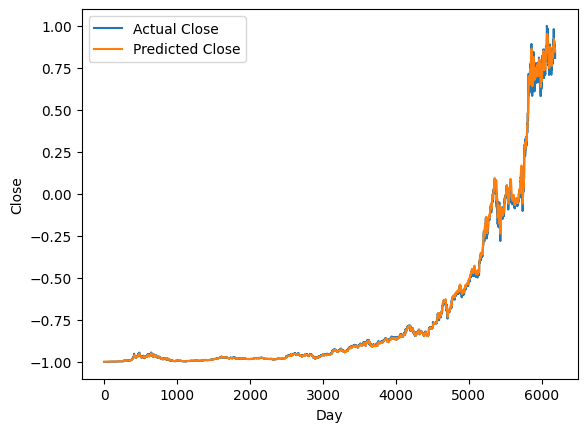

In [33]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [34]:
train_predictions= predicted.flatten()

dummies =np.zeros((x_train.shape[0], lookback+1))
dummies[:,0]=train_predictions
dummies=scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:,0])
train_predictions

array([1.61669406e-01, 1.61991777e-01, 1.61708312e-01, ...,
       1.73038212e+02, 1.72202714e+02, 1.72502886e+02])

In [37]:
dummies =np.zeros((x_train.shape[0], lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scaler.inverse_transform(dummies)

new_y_train= dc(dummies[:,0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.69091505e+02, 1.73315001e+02, 1.68871003e+02])

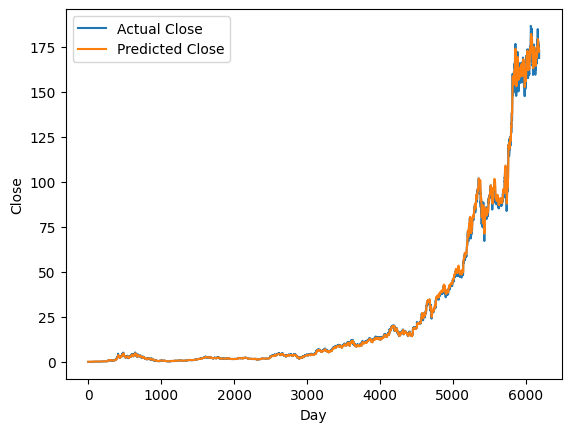

In [38]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [39]:
#now the are on the proper scale

In [41]:
test_predictions= model(x_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:,0]=test_predictions
dummies=scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:,0])
test_predictions

array([171.66427687, 171.32009566, 170.42100255, 170.60552112,
       170.96180793, 171.2304209 , 171.08024041, 171.25365385,
       171.02841647, 170.70535613, 169.91875943, 170.23107037,
       169.80555158, 168.67604092, 167.51283693, 166.48022659,
       165.44067971, 165.72301013, 165.9510488 , 165.15306907,
       164.83403281, 163.73613676, 162.1488035 , 159.5657325 ,
       154.78392358, 151.81588586, 148.26994784, 145.40074466,
       143.78120208, 144.32423071, 146.81732126, 149.28116496,
       150.88491691, 148.21034253, 152.14566597, 155.03591777,
       158.02331999, 160.03610534, 160.84651303, 159.73821217,
       159.316673  , 159.09722719, 159.39408654, 158.61373162,
       157.47043126, 155.96285707, 153.19481173, 153.14282104,
       153.92892862, 154.53677608, 154.34380916, 154.53013412,
       153.40896621, 151.80515868, 147.79993072, 144.31125805,
       142.96952158, 144.70844708, 145.71174944, 145.36338296,
       147.02392781, 150.12258143, 153.56303738, 157.10

In [42]:
dummies=np.zeros((x_test.shape[0], lookback+1))
dummies[:,0]=y_test.flatten()
dummies= scaler.inverse_transform(dummies)

new_y_test=dc(dummies[:,0])
new_y_test

array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

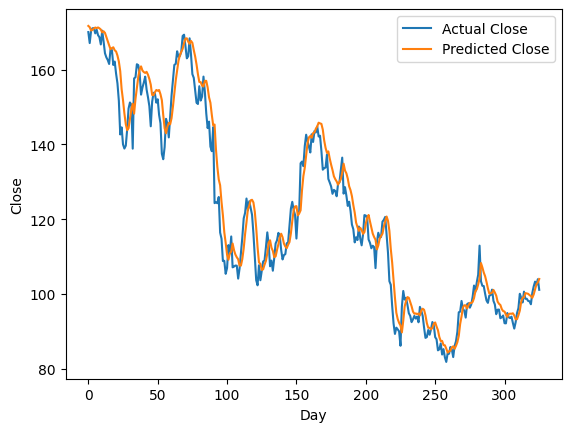

In [43]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()